In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import LSTM 

In [2]:

import pandas
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math 

Using TensorFlow backend.


In [3]:
data=pandas.read_csv(r"../input/airlinepassengers1csv/airline-passengers1.csv")

In [4]:
data.head(10)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [5]:
data=data.iloc[:,1]

In [6]:
data.tail()

139    606
140    508
141    461
142    390
143    432
Name: Passengers, dtype: int64

In [7]:
dataset=data.astype('float32')
dataset=dataset.values
type(dataset)

numpy.ndarray

In [8]:
data.shape

(144,)

In [9]:
dataset=dataset.reshape(144,1)

In [10]:
dataset.shape

(144, 1)

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [12]:
dataset.shape

(144, 1)

In [13]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [14]:
train_size=int(len(dataset)*0.7)
test_size=int(len(dataset)-train_size)
train=dataset[test_size:len(dataset),:]
test=dataset[0:test_size,:]

In [15]:
print(len(train),len(test))

100 44


In [16]:
print(train.shape)
print(test.shape)

(100, 1)
(44, 1)


In [17]:
train

array([[0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.17374519],
       [0.17760617],
       [0.17760617],
       [0.25482625],
       [0.25289574],
       [0.24131274],
       [0.26833975],
       [0.3088803 ],
       [0.32432434],
       [0.25675675],
       [0.20656371],
       [0.14671814],
       [0.18725869],
       [0.19305018],
       [0.16216215],
       [0.25289574],
       [0.23745173],
       [0.25096524],
       [0.3088803 ],
       [0.38223937],
       [0.36486486],
       [0.2992278 ],
       [0.24131274],
       [0.1911197 ],
       [0.24131274],
       [0.26640925],
       [0.24903473],
       [0.31467178],
       [0.3185328 ],
       [0.32046333],
       [0.4073359 ],
       [0.5019305 ],
       [0.46911195],
       [0.40154442],
       [0.32818535],
       [0.25675675],
       [0.3359073 ],
       [0.34749034],
       [0.33397684],
       [0.41119692],
       [0.4034749 ],
       [0.4131274 ],
       [0.52123547],
       [0.5965251 ],
       [0.581

In [18]:
import numpy

In [19]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(98, 1)
(98,)
(42, 1)
(42,)


In [21]:
trainX=numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(98, 1, 1)
(98,)
(42, 1, 1)


In [24]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [26]:
model.fit(trainX,trainY,epochs=1000)

Epoch 1/1000
98/98 [==============================] - 0s 105us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 2/1000
98/98 [==============================] - 0s 102us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 3/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 4/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0056 - accuracy: 0.0102
Epoch 5/1000
98/98 [==============================] - 0s 105us/step - loss: 0.0056 - accuracy: 0.0102
Epoch 6/1000
98/98 [==============================] - 0s 109us/step - loss: 0.0056 - accuracy: 0.0102
Epoch 7/1000
98/98 [==============================] - 0s 121us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 8/1000
98/98 [==============================] - 0s 142us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 9/1000
98/98 [==============================] - 0s 125us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 10/1000
98/98 [==============================] - 0s 117us/step - loss: 0.0054 

98/98 [==============================] - 0s 84us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 82/1000
98/98 [==============================] - 0s 82us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 83/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 84/1000
98/98 [==============================] - 0s 80us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 85/1000
98/98 [==============================] - 0s 85us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 86/1000
98/98 [==============================] - 0s 78us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 87/1000
98/98 [==============================] - 0s 102us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 88/1000
98/98 [==============================] - 0s 76us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 89/1000
98/98 [==============================] - 0s 77us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 90/1000
98/98 [==============================] - 0s 76us/step - loss: 0.0054 - accuracy: 

98/98 [==============================] - 0s 89us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 161/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 162/1000
98/98 [==============================] - 0s 83us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 163/1000
98/98 [==============================] - 0s 80us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 164/1000
98/98 [==============================] - 0s 90us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 165/1000
98/98 [==============================] - 0s 91us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 166/1000
98/98 [==============================] - 0s 386us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 167/1000
98/98 [==============================] - 0s 142us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 168/1000
98/98 [==============================] - 0s 133us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 169/1000
98/98 [==============================] - 0s 132us/step - loss: 0.0054 

98/98 [==============================] - 0s 83us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 240/1000
98/98 [==============================] - 0s 88us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 241/1000
98/98 [==============================] - 0s 85us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 242/1000
98/98 [==============================] - 0s 83us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 243/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 244/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 245/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 246/1000
98/98 [==============================] - 0s 96us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 247/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 248/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0054 - ac

98/98 [==============================] - 0s 98us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 318/1000
98/98 [==============================] - 0s 88us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 319/1000
98/98 [==============================] - 0s 92us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 320/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 321/1000
98/98 [==============================] - 0s 76us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 322/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 323/1000
98/98 [==============================] - 0s 89us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 324/1000
98/98 [==============================] - 0s 91us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 325/1000
98/98 [==============================] - 0s 95us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 326/1000
98/98 [==============================] - 0s 74us/step - loss: 0.0054 - ac

98/98 [==============================] - 0s 89us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 397/1000
98/98 [==============================] - 0s 89us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 398/1000
98/98 [==============================] - 0s 112us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 399/1000
98/98 [==============================] - 0s 106us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 400/1000
98/98 [==============================] - 0s 96us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 401/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 402/1000
98/98 [==============================] - 0s 82us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 403/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 404/1000
98/98 [==============================] - 0s 98us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 405/1000
98/98 [==============================] - 0s 89us/step - loss: 0.0053 - 

98/98 [==============================] - 0s 90us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 476/1000
98/98 [==============================] - 0s 79us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 477/1000
98/98 [==============================] - 0s 79us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 478/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 479/1000
98/98 [==============================] - 0s 91us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 480/1000
98/98 [==============================] - 0s 109us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 481/1000
98/98 [==============================] - 0s 98us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 482/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 483/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 484/1000
98/98 [==============================] - 0s 79us/step - loss: 0.0054 - a

98/98 [==============================] - 0s 86us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 555/1000
98/98 [==============================] - 0s 78us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 556/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 557/1000
98/98 [==============================] - 0s 88us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 558/1000
98/98 [==============================] - 0s 79us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 559/1000
98/98 [==============================] - 0s 98us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 560/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 561/1000
98/98 [==============================] - 0s 100us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 562/1000
98/98 [==============================] - 0s 90us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 563/1000
98/98 [==============================] - 0s 80us/step - loss: 0.0053 - a

98/98 [==============================] - 0s 86us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 634/1000
98/98 [==============================] - 0s 78us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 635/1000
98/98 [==============================] - 0s 82us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 636/1000
98/98 [==============================] - 0s 102us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 637/1000
98/98 [==============================] - 0s 98us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 638/1000
98/98 [==============================] - 0s 128us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 639/1000
98/98 [==============================] - 0s 90us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 640/1000
98/98 [==============================] - 0s 92us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 641/1000
98/98 [==============================] - 0s 104us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 642/1000
98/98 [==============================] - 0s 86us/step - loss: 0.0053 -

98/98 [==============================] - 0s 86us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 713/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 714/1000
98/98 [==============================] - 0s 93us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 715/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 716/1000
98/98 [==============================] - 0s 93us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 717/1000
98/98 [==============================] - 0s 87us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 718/1000
98/98 [==============================] - 0s 87us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 719/1000
98/98 [==============================] - 0s 88us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 720/1000
98/98 [==============================] - 0s 80us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 721/1000
98/98 [==============================] - 0s 87us/step - loss: 0.0053 - ac

98/98 [==============================] - 0s 81us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 792/1000
98/98 [==============================] - 0s 87us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 793/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 794/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 795/1000
98/98 [==============================] - 0s 84us/step - loss: 0.0056 - accuracy: 0.0102
Epoch 796/1000
98/98 [==============================] - 0s 83us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 797/1000
98/98 [==============================] - 0s 79us/step - loss: 0.0055 - accuracy: 0.0102
Epoch 798/1000
98/98 [==============================] - 0s 88us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 799/1000
98/98 [==============================] - 0s 81us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 800/1000
98/98 [==============================] - 0s 99us/step - loss: 0.0053 - ac

98/98 [==============================] - 0s 91us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 871/1000
98/98 [==============================] - 0s 94us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 872/1000
98/98 [==============================] - 0s 77us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 873/1000
98/98 [==============================] - 0s 102us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 874/1000
98/98 [==============================] - 0s 96us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 875/1000
98/98 [==============================] - 0s 98us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 876/1000
98/98 [==============================] - 0s 102us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 877/1000
98/98 [==============================] - 0s 93us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 878/1000
98/98 [==============================] - 0s 87us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 879/1000
98/98 [==============================] - 0s 87us/step - loss: 0.0053 - 

98/98 [==============================] - 0s 92us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 950/1000
98/98 [==============================] - 0s 100us/step - loss: 0.0054 - accuracy: 0.0102
Epoch 951/1000
98/98 [==============================] - 0s 89us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 952/1000
98/98 [==============================] - 0s 89us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 953/1000
98/98 [==============================] - 0s 85us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 954/1000
98/98 [==============================] - 0s 89us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 955/1000
98/98 [==============================] - 0s 88us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 956/1000
98/98 [==============================] - 0s 99us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 957/1000
98/98 [==============================] - 0s 77us/step - loss: 0.0053 - accuracy: 0.0102
Epoch 958/1000
98/98 [==============================] - 0s 91us/step - loss: 0.0053 - a

In [27]:
trainPredict = model.predict(trainX)
print(trainPredict)
testPredict = model.predict(testX)
print([trainY])

[[0.22000194]
 [0.18803257]
 [0.15519232]
 [0.19330657]
 [0.19683507]
 [0.19683507]
 [0.2692191 ]
 [0.2673738 ]
 [0.256335  ]
 [0.28217638]
 [0.32140207]
 [0.3364504 ]
 [0.27106583]
 [0.22359967]
 [0.16889706]
 [0.20569906]
 [0.21104571]
 [0.1827817 ]
 [0.2673738 ]
 [0.25266844]
 [0.26553005]
 [0.32140207]
 [0.39312708]
 [0.3761048 ]
 [0.31202212]
 [0.256335  ]
 [0.20926118]
 [0.256335  ]
 [0.2803212 ]
 [0.26368788]
 [0.32703984]
 [0.33080205]
 [0.33268422]
 [0.41769773]
 [0.50939995]
 [0.47782445]
 [0.41203144]
 [0.34021896]
 [0.27106583]
 [0.34776264]
 [0.35909152]
 [0.34587598]
 [0.4214735 ]
 [0.41392052]
 [0.4233607 ]
 [0.5278109 ]
 [0.59817827]
 [0.58394974]
 [0.49272355]
 [0.4006911 ]
 [0.33456692]
 [0.4006911 ]
 [0.41769773]
 [0.3912358 ]
 [0.49458107]
 [0.47969046]
 [0.49272355]
 [0.6140462 ]
 [0.68766946]
 [0.6910011 ]
 [0.5821633 ]
 [0.47782445]
 [0.39880028]
 [0.4572385 ]
 [0.4647365 ]
 [0.4233607 ]
 [0.50570244]
 [0.47969046]
 [0.5075518 ]
 [0.63669556]
 [0.7303127 ]
 [0.75

In [28]:
trainPredict = scaler.inverse_transform(trainPredict)
print(trainY.shape)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

(98,)


In [29]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 37.77 RMSE
Test Score: 19.67 RMSE


In [30]:
trainPredict=scaler.inverse_transform(trainPredict)

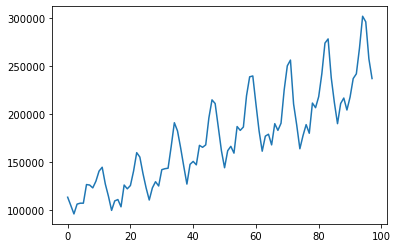

In [31]:
plt.plot(trainPredict)
plt.show()



In [32]:
testPredict=scaler.inverse_transform(testPredict)

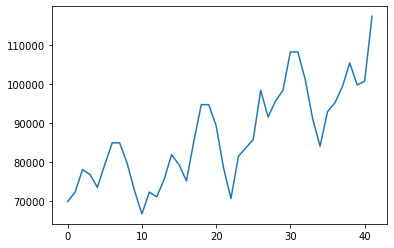

In [33]:
plt.plot(testPredict)
plt.show()

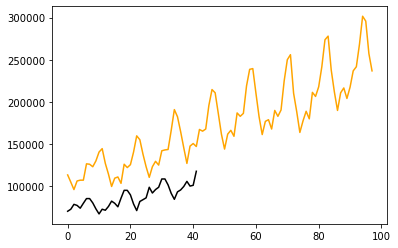

In [34]:
plt.plot(trainPredict,color='orange')
plt.plot(testPredict,color='black')
plt.show()

In [35]:

trainPredict.shape

(98, 1)

In [36]:
testPredict

array([[ 69843.61 ],
       [ 72262.445],
       [ 78051.07 ],
       [ 76793.945],
       [ 73486.   ],
       [ 79317.1  ],
       [ 84903.55 ],
       [ 84903.55 ],
       [ 79741.086],
       [ 72669.266],
       [ 66678.125],
       [ 72262.445],
       [ 71048.3  ],
       [ 75545.836],
       [ 81875.484],
       [ 79317.1  ],
       [ 75131.836],
       [ 85339.84 ],
       [ 94706.37 ],
       [ 94706.37 ],
       [ 89307.23 ],
       [ 78472.09 ],
       [ 70645.68 ],
       [ 81446.68 ],
       [ 83600.19 ],
       [ 85777.055],
       [ 98371.17 ],
       [ 91542.11 ],
       [ 95617.83 ],
       [ 98371.17 ],
       [108216.7  ],
       [108216.7  ],
       [101152.086],
       [ 91093.42 ],
       [ 84033.72 ],
       [ 92893.24 ],
       [ 95161.695],
       [ 99295.14 ],
       [105372.4  ],
       [ 99758.26 ],
       [100686.734],
       [117369.36 ]], dtype=float32)

In [37]:
testY

array([[117.99999916, 131.99999879, 129.00000163, 120.99999632,
        135.00000368, 147.99999397, 147.99999397, 136.00000531,
        119.00000078, 103.99999952, 117.99999916, 115.00000199,
        125.99999674, 140.99999801, 135.00000368, 125.00000283,
        148.9999956 , 169.99999891, 169.99999891, 157.99999481,
        133.00000042, 114.00000036, 139.99999638, 145.00000452,
        149.99999723, 177.9999965 , 163.00000295, 172.00000217,
        177.9999965 , 198.99999982, 198.99999982, 184.00000627,
        162.00000133, 146.00000615, 165.9999924 , 171.00000054,
        179.99999976, 193.00000549, 181.00000139, 183.00000464,
        217.99999988, 230.00000398]])